## Importing Libraries

In [816]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

## Reading Dateset

In [817]:
df = pd.read_csv('udemy_courses_clean.csv')
df.head(5)

,Unnamed: 0,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,clean_course_title
0,0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5 hours,2017-01-18T20:58:58Z,Business Finance,Ultimate Investment Banking Course
1,1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39 hours,2017-03-09T16:34:20Z,Business Finance,Complete GST Course Certification Grow Practice
2,2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5 hours,2016-12-19T19:26:30Z,Business Finance,Financial Modeling Business Analysts Consultants
3,3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3 hours,2017-05-30T20:07:24Z,Business Finance,Beginner Pro Financial Analysis Excel 2017
4,4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2 hours,2016-12-13T14:57:18Z,Business Finance,Maximize Profits Trading Options


# Analysis

## Knowing Columns Of DataSet

In [818]:
df.columns

Index(['Unnamed: 0', 'course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject',
       'clean_course_title'],
      dtype='object')

## Check Duplicates

In [819]:
df.duplicated().sum()

0

## Chech Nulls

In [820]:
df.isna().sum()

Unnamed: 0              0
course_id               0
course_title            0
url                     0
is_paid                 0
price                   0
num_subscribers         0
num_reviews             0
num_lectures            0
level                   0
content_duration        0
published_timestamp     0
subject                 0
clean_course_title     20
dtype: int64

## Column Subject

In [821]:
df['subject']

0       Business Finance
1       Business Finance
2       Business Finance
3       Business Finance
4       Business Finance
              ...       
3678     Web Development
3679     Web Development
3680     Web Development
3681     Web Development
3682     Web Development
Name: subject, Length: 3683, dtype: object

In [822]:
df['subject'].unique()

array(['Business Finance', 'Graphic Design', 'Musical Instruments',
       'Web Development'], dtype=object)

In [823]:
Unique_Subject_Values = len(df['subject'].unique())
Unique_Subject_Values

4

### Get Count Per Each Subject

In [824]:
subjects = df['subject'].value_counts()
subjects

subject
Web Development        1200
Business Finance       1199
Musical Instruments     681
Graphic Design          603
Name: count, dtype: int64

## Column Number Of Subscribers

In [825]:
df['num_subscribers']

0       2147
1       2792
2       2174
3       2451
4       1276
        ... 
3678    1040
3679     306
3680     513
3681     300
3682     901
Name: num_subscribers, Length: 3683, dtype: int64

### Get Summation Of Number Of Subscribers Per Each Subject

In [826]:
df.groupby('subject')['num_subscribers'].sum()

subject
Business Finance       1870747
Graphic Design         1063148
Musical Instruments     846719
Web Development        7980572
Name: num_subscribers, dtype: int64

### Calculate Aggregation Functions Of subscribers

In [827]:
Aggregation_Func_Of_Subscribers = df['num_subscribers'].describe()
Aggregation_Func_Of_Subscribers

count      3683.000000
mean       3193.371165
std        9498.231406
min           0.000000
25%         110.000000
50%         911.000000
75%        2537.500000
max      268923.000000
Name: num_subscribers, dtype: float64

### Get The ID Of Maximum Number Of Subscribers

In [828]:
Max_No_Subscribers_ID = df['num_subscribers'].idxmax()
Max_No_Subscribers_ID

2832

### Get Location Of Maximum ID

In [829]:
df.iloc[2832]

Unnamed: 0                                                          2832
course_id                                                          41295
course_title                        Learn HTML5 Programming From Scratch
url                    https://www.udemy.com/learn-html5-programming-...
is_paid                                                            False
price                                                               Free
num_subscribers                                                   268923
num_reviews                                                         8629
num_lectures                                                          45
level                                                         All Levels
content_duration                                              10.5 hours
published_timestamp                                 2013-02-14T07:03:41Z
subject                                                  Web Development
clean_course_title                       Learn HTML

## Column Level

In [830]:
df['level']

0               All Levels
1               All Levels
2       Intermediate Level
3               All Levels
4       Intermediate Level
               ...        
3678            All Levels
3679        Beginner Level
3680            All Levels
3681            All Levels
3682        Beginner Level
Name: level, Length: 3683, dtype: object

### Check Uique Values Of Column Level

In [831]:
Unique_Level_Values = df['level'].unique()
Unique_Level_Values

array(['All Levels', 'Intermediate Level', 'Beginner Level',
       'Expert Level', '52'], dtype=object)

### Get Index Of Value 52

In [832]:
rec = (df['level'] == '52')
df[rec]

,Unnamed: 0,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,clean_course_title
2066,2066,96698,Learn Classical Guitar Technique and play 'Spa...,"000!""",https://www.udemy.com/learnguitartoworship/,TRUE,30,1463,29,52,Beginner Level,3 hours,Musical Instruments,Learn Classical Guitar Technique play Spanish ...


In [833]:
df = df.drop(index=2066)

In [834]:
df['level'].unique()

array(['All Levels', 'Intermediate Level', 'Beginner Level',
       'Expert Level'], dtype=object)

### Calculte Counts Per Each Level

In [835]:
Value_Counts_Of_Level = df['level'].value_counts()
Value_Counts_Of_Level

level
All Levels            1932
Beginner Level        1271
Intermediate Level     421
Expert Level            58
Name: count, dtype: int64

### Get Summation Of Number Of Subscribers Per Each Level

In [836]:
df.groupby('level')['num_subscribers'].sum()

level
All Levels            6916112
Beginner Level        4052843
Expert Level            50196
Intermediate Level     742005
Name: num_subscribers, dtype: int64

### Calculate Counts Of Each Level Per Each Subject

In [837]:
df.groupby('subject')['level'].value_counts()


subject              level             
Business Finance     All Levels            699
                     Beginner Level        341
                     Intermediate Level    128
                     Expert Level           31
Graphic Design       All Levels            298
                     Beginner Level        243
                     Intermediate Level     57
                     Expert Level            5
Musical Instruments  Beginner Level        296
                     All Levels            276
                     Intermediate Level    101
                     Expert Level            7
Web Development      All Levels            659
                     Beginner Level        391
                     Intermediate Level    135
                     Expert Level           15
Name: count, dtype: int64

## Column Price

In [838]:
Unique_Price_Values = df['price'].unique()
Unique_Price_Values

array(['200', '75', '45', '95', '150', '65', '195', '30', '20', '50',
       '175', '140', '115', '190', '125', '60', '145', '105', '155',
       '185', '180', '120', '25', '160', '40', 'Free', '100', '90', '35',
       '80', '70', '55', '165', '130', '85', '170', '110', '135'],
      dtype=object)

### Chech DataType Of Column Price

In [839]:
df['price'].dtype

dtype('O')

In [840]:
df['price'] = df['price'].str.replace('Free', '0', regex=True)

In [841]:
df['price'].unique()

array(['200', '75', '45', '95', '150', '65', '195', '30', '20', '50',
       '175', '140', '115', '190', '125', '60', '145', '105', '155',
       '185', '180', '120', '25', '160', '40', '0', '100', '90', '35',
       '80', '70', '55', '165', '130', '85', '170', '110', '135'],
      dtype=object)

In [842]:
df['price'] = df['price'].astype(float)

In [843]:
df['price'].describe()

count    3682.000000
mean       66.010320
std        60.984167
min         0.000000
25%        20.000000
50%        45.000000
75%        95.000000
max       200.000000
Name: price, dtype: float64

In [844]:
df['price'].idxmax()

0

In [845]:
df.iloc[0]

Unnamed: 0                                                             0
course_id                                                        1070968
course_title                          Ultimate Investment Banking Course
url                    https://www.udemy.com/ultimate-investment-bank...
is_paid                                                             True
price                                                              200.0
num_subscribers                                                     2147
num_reviews                                                           23
num_lectures                                                          51
level                                                         All Levels
content_duration                                               1.5 hours
published_timestamp                                 2017-01-18T20:58:58Z
subject                                                 Business Finance
clean_course_title                    Ultimate Inve

### Calculate Profit Of Udemy

In [846]:
df['profit'] = df['price'] * df['num_subscribers']

In [847]:
df['profit'].max()

24316800.0

In [848]:
df['profit'].idxmax()

3235

In [849]:
df.iloc[3235]

Unnamed: 0                                                   3236
course_id                                                  164554
course_title                  AngularJS JumpStart with Dan Wahlin
url                    https://www.udemy.com/angularjs-jumpstart/
is_paid                                                      True
price                                                        75.0
num_subscribers                                             17802
num_reviews                                                  2144
num_lectures                                                  113
level                                                  All Levels
content_duration                                         10 hours
published_timestamp                          2014-03-24T17:31:15Z
subject                                           Web Development
clean_course_title                 AngularJS JumpStart Dan Wahlin
profit                                                  1335150.0
Name: 3236

## Column Is_Paid

In [850]:
df['is_paid']

0       True
1       True
2       True
3       True
4       True
        ... 
3678    True
3679    True
3680    True
3681    True
3682    True
Name: is_paid, Length: 3682, dtype: object

In [851]:
df['is_paid'].value_counts()

is_paid
True     2738
TRUE      634
False     264
FALSE      46
Name: count, dtype: int64

### Maping Values 

In [852]:
paid_dict = {
    'True' : True,
    'TRUE' : True,
    'False' : False,
    'FALSE' : False
}

In [853]:
df['is_paid'] = df['is_paid'].map(paid_dict)

In [854]:
is_paid = df['is_paid'].value_counts()
is_paid

is_paid
True     3372
False     310
Name: count, dtype: int64

### Calculate Counts Of Free And Not For Each Subject

In [855]:
paid_or_not = df.groupby('subject')['is_paid'].value_counts()
paid_or_not

subject              is_paid
Business Finance     True       1103
                     False        96
Graphic Design       True        568
                     False        35
Musical Instruments  True        634
                     False        46
Web Development      True       1067
                     False       133
Name: count, dtype: int64

## Column Published_Date

In [856]:
df['published_timestamp']

0       2017-01-18T20:58:58Z
1       2017-03-09T16:34:20Z
2       2016-12-19T19:26:30Z
3       2017-05-30T20:07:24Z
4       2016-12-13T14:57:18Z
                ...         
3678    2016-06-14T17:36:46Z
3679    2017-03-10T22:24:30Z
3680    2015-12-30T16:41:42Z
3681    2016-08-11T19:06:15Z
3682    2014-09-28T19:51:11Z
Name: published_timestamp, Length: 3682, dtype: object

### Convert To Date Type

In [857]:
df['published_date'] = df['published_timestamp'].str.split('T').str.get(0)

In [858]:
df['published_date']

0       2017-01-18
1       2017-03-09
2       2016-12-19
3       2017-05-30
4       2016-12-13
           ...    
3678    2016-06-14
3679    2017-03-10
3680    2015-12-30
3681    2016-08-11
3682    2014-09-28
Name: published_date, Length: 3682, dtype: object

In [859]:
df['published_date'] = pd.to_datetime(df['published_date'], format='%Y-%m-%d')

### Chack Type For Each Column

In [860]:
Types_For_all_Cols = df.dtypes
Types_For_all_Cols

Unnamed: 0                      int64
course_id                       int64
course_title                   object
url                            object
is_paid                          bool
price                         float64
num_subscribers                 int64
num_reviews                     int64
num_lectures                    int64
level                          object
content_duration               object
published_timestamp            object
subject                        object
clean_course_title             object
profit                        float64
published_date         datetime64[ns]
dtype: object

### Get Year & Month & Day

In [861]:
df['year'] = df['published_date'].dt.year
df['month'] = df['published_date'].dt.month
df['day'] = df['published_date'].dt.day


### Get Summation Of Number Of Subscribers Per Year

In [862]:
subscribers_per_year = df.groupby('year')['num_subscribers'].sum()
subscribers_per_year

year
2011     119028
2012     555339
2013    1723438
2014    1930406
2015    3475324
2016    2966644
2017     990977
Name: num_subscribers, dtype: int64

# Visualizations

### Ploting Distribution Of Subjetcs

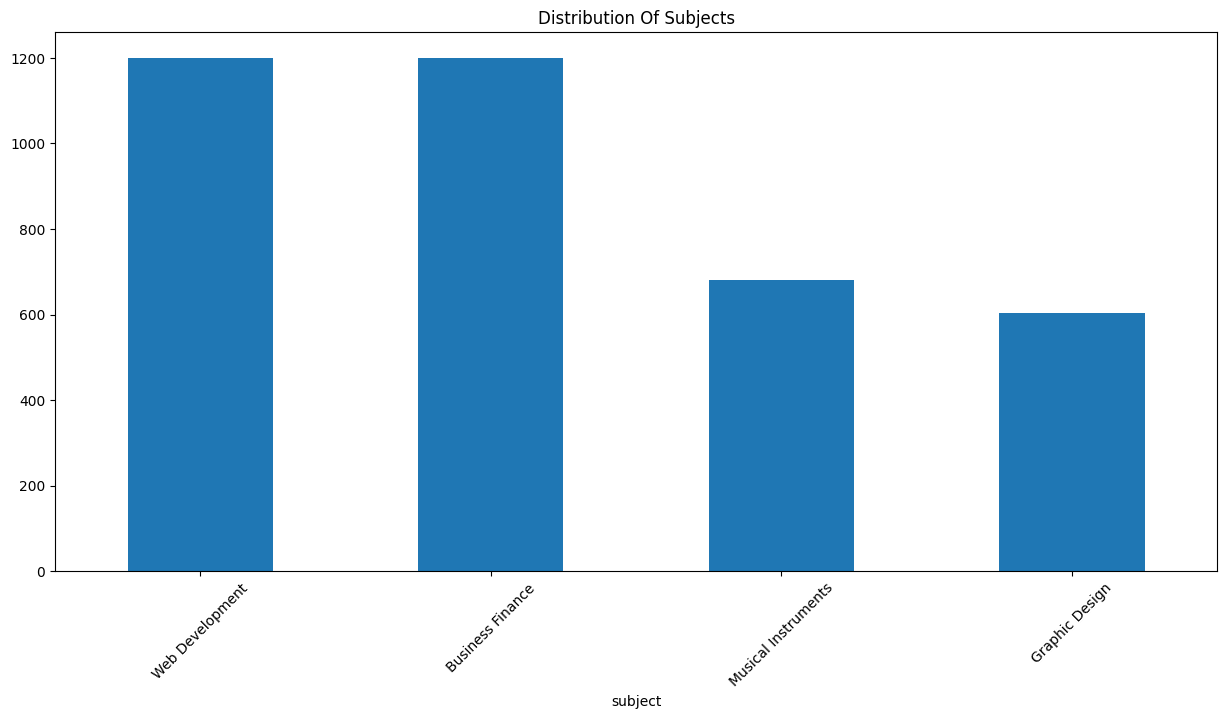

In [863]:
plt.figure(figsize=(15,7))
subjects.plot(kind='bar')
plt.title("Distribution Of Subjects")
plt.xticks(rotation=45)
plt.show()

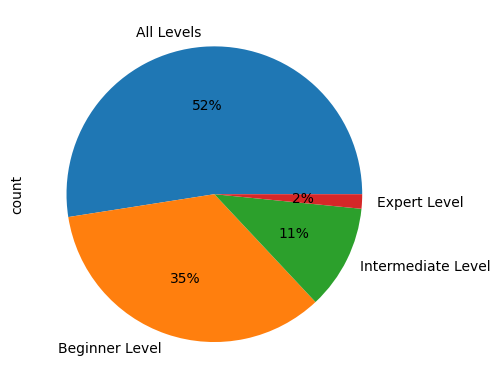

In [864]:
Value_Counts_Of_Level.plot(kind='pie',  autopct='%1.0f%%')
plt.show()

In [865]:
def func_draw(x):
    plt.figure(figsize=(20,10))
    sns.barplot(x = 'level', y = x, data=df, hue='subject', ci = None)
    plt.show()

C:\Users\Ahmed\AppData\Local\Temp\ipykernel_4548\3050811586.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = 'level', y = x, data=df, hue='subject', ci = None)


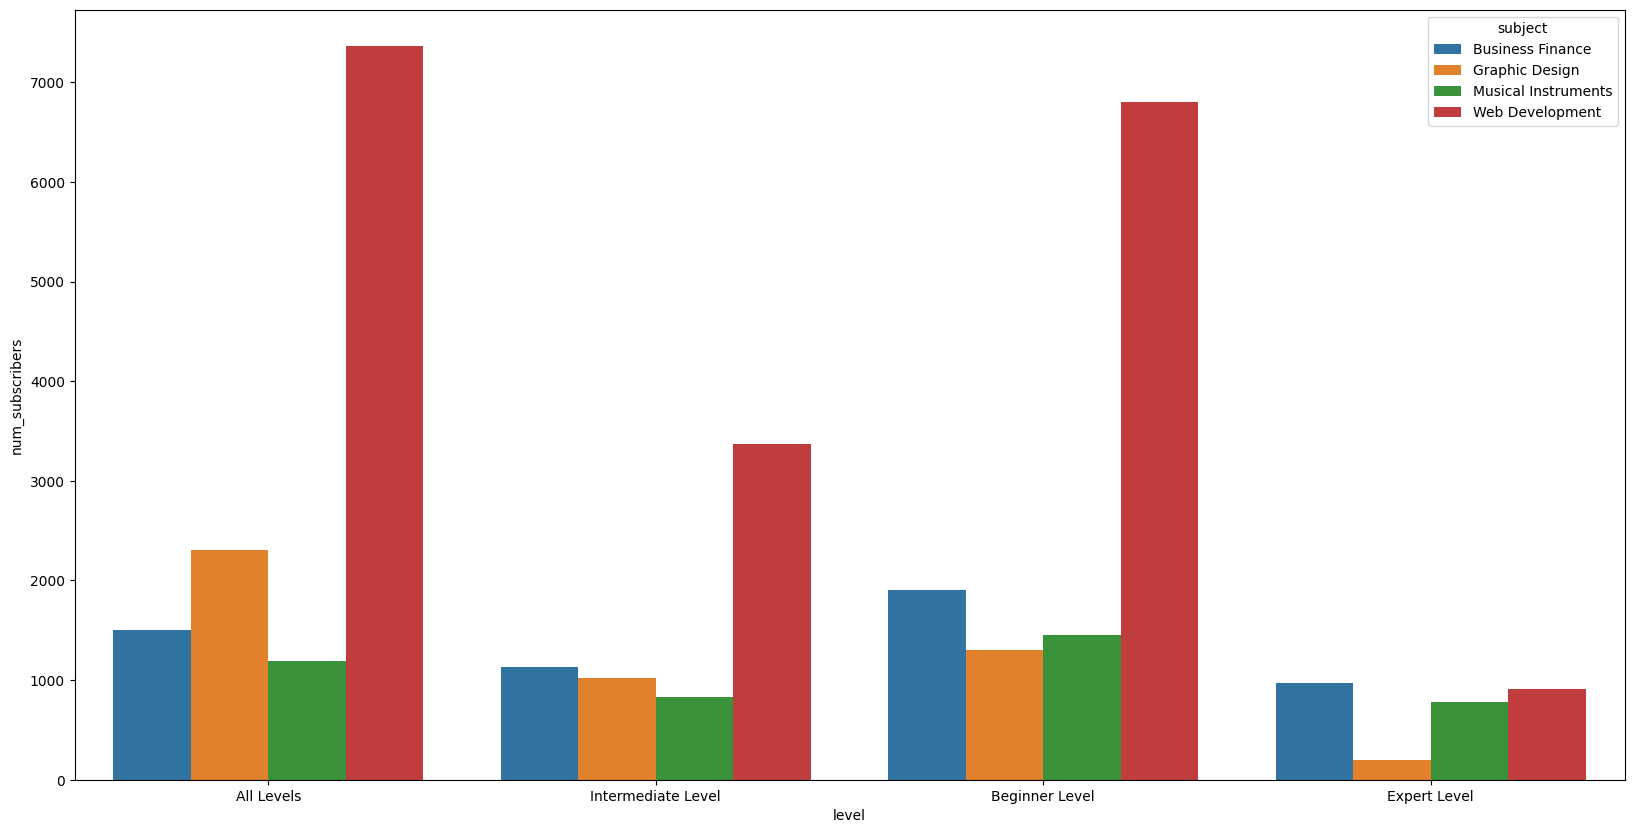

In [866]:
func_draw('num_subscribers')

### Ploting Distribution Of Is_Paid Column 

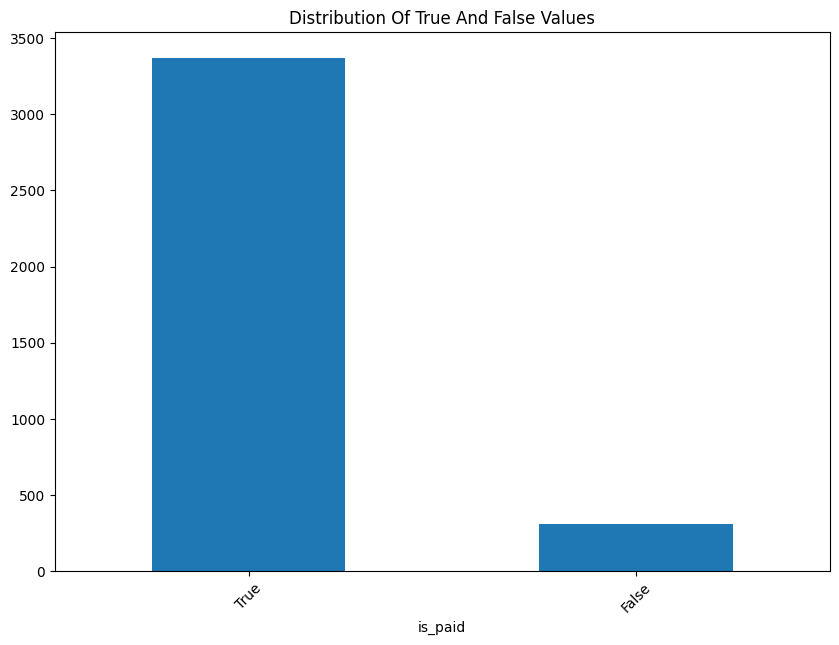

In [867]:
plt.figure(figsize=(10,7))
is_paid.plot(kind='bar')
plt.title('Distribution Of True And False Values')
plt.xticks(rotation=45)
plt.show()

### Distributions Of Free And Not For Each Subject

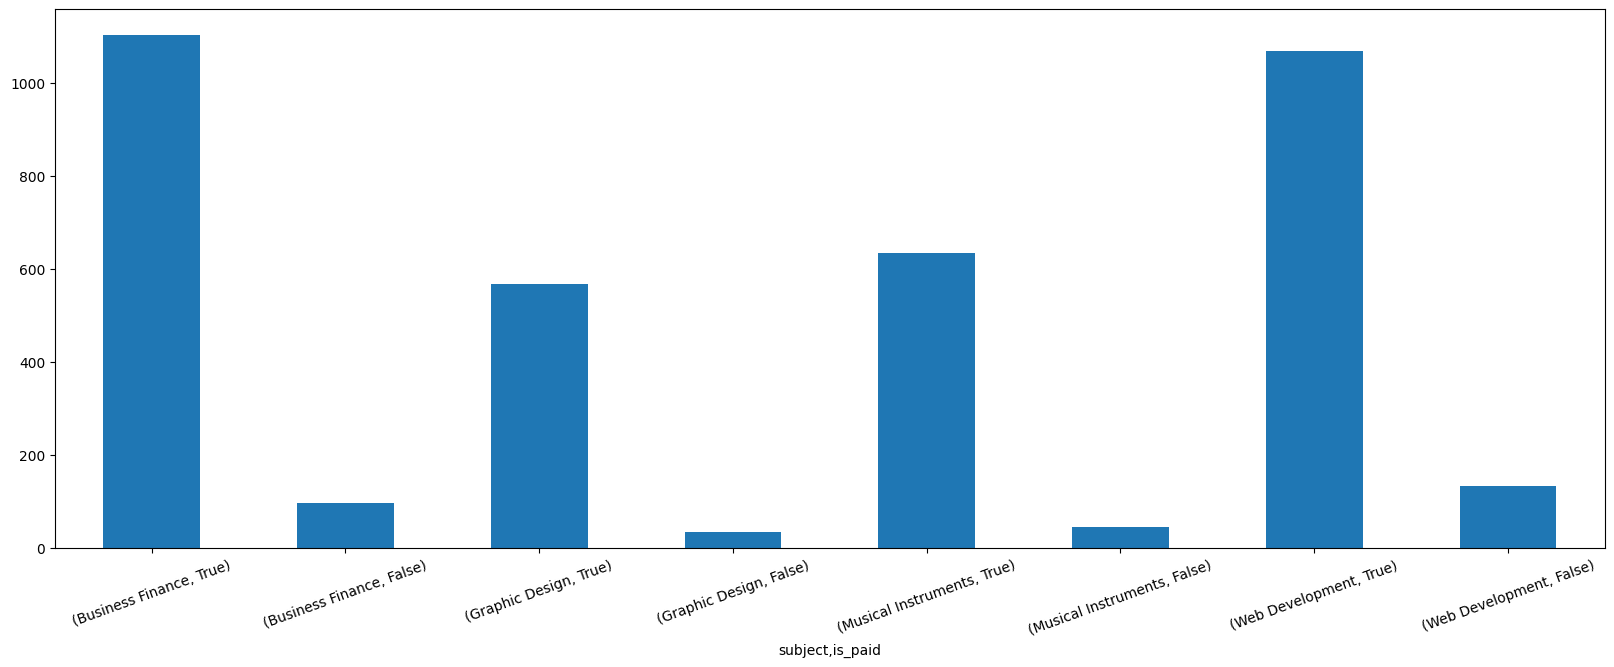

In [868]:
plt.figure(figsize=(20,7))
paid_or_not.plot(kind='bar')
plt.xticks(rotation = 20)
plt.show()

### Time Series Of Number Of Subscribers Per Year

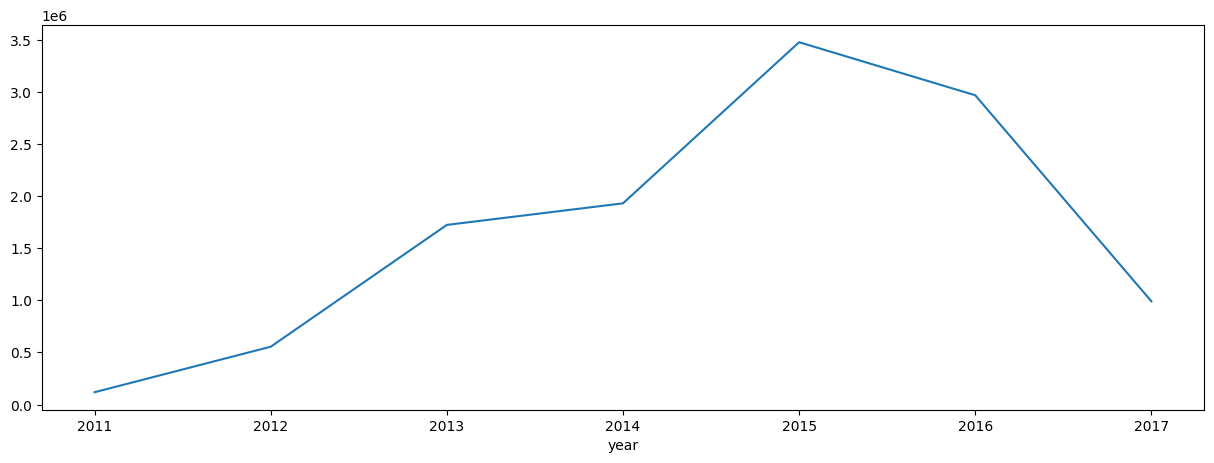

In [869]:
plt.figure(figsize=(15,5))
subscribers_per_year.plot(kind='line')
plt.show()

### Time Series For Each Subject Per Year

C:\Users\Ahmed\AppData\Local\Temp\ipykernel_4548\1691673142.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x = 'year', y = 'num_subscribers', data=df, hue='subject', ci = None)


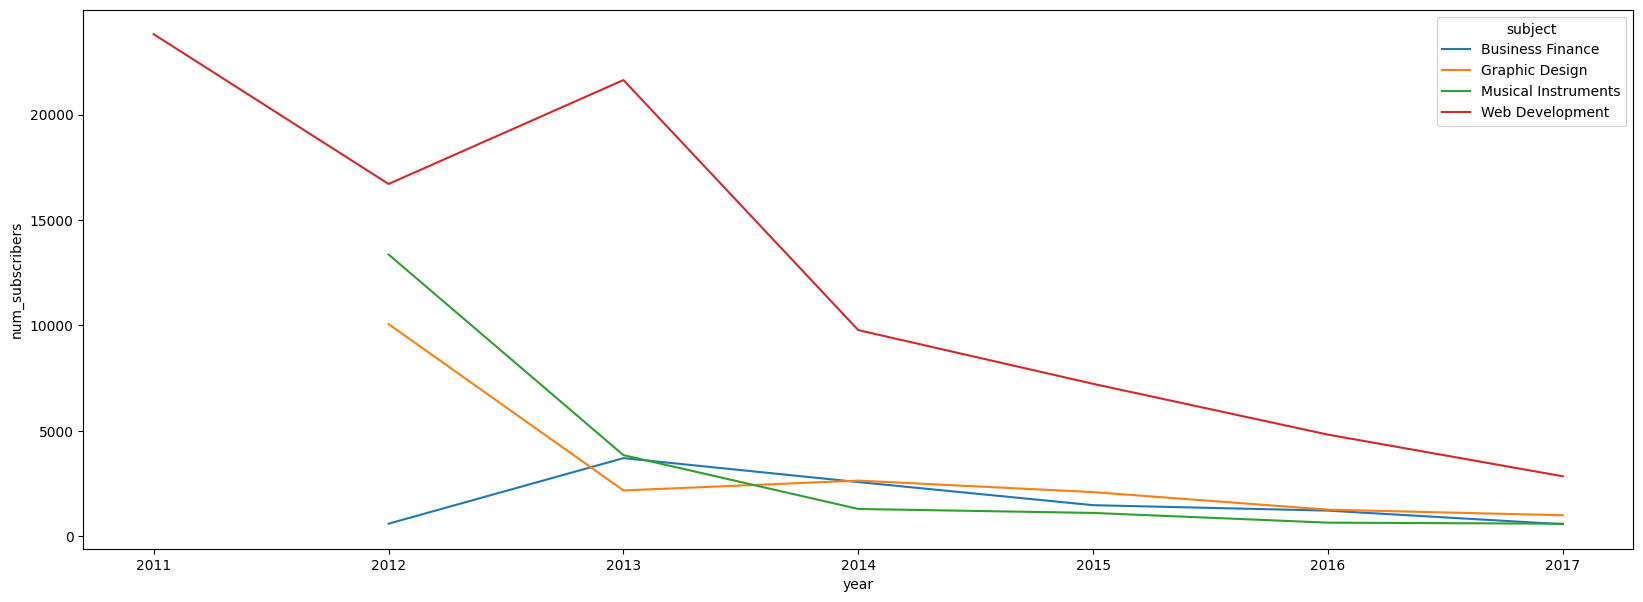

In [870]:
plt.figure(figsize=(20,7))
sns.lineplot(x = 'year', y = 'num_subscribers', data=df, hue='subject', ci = None)
plt.show()